In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [71]:
def resident(x, t):
    lamda = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha1)*x[2]
    return sdot,i1dot,d11dot

In [72]:
mu = 0.02
rho = 0.02
sigmaS = 1
sigmaI = 5

beta1=0.75
alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))

In [73]:
tmax2 = 2000
ts2 = np.linspace(0,200,tmax2)

In [74]:
x0 = [0.8,0.5,0.05]
xs = odeint(resident,x0,ts2)
Ss = xs[:,0]
I1s = xs[:,1]
D11s = xs[:,2]

S=Ss[1999]
I1=I1s[1999]
D11=D11s[1999]

In [75]:
betas = np.linspace(0,1,100)
alphas = np.zeros(100)

In [76]:
for i in range(100):
    beta1=betas[i]
    alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))
    alphas[i]=alpha1

(0.0, 0.15232277449369297)

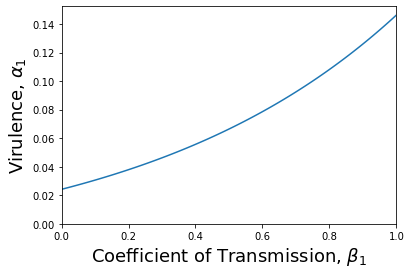

In [77]:
plt.plot(betas,alphas)
plt.xlabel(r'Coefficient of Transmission, $\beta_1$',fontsize=18)
plt.ylabel(r'Virulence, $\alpha_1$',fontsize=18)
plt.xlim(0,1)
plt.ylim(0)